# Statistics

**Population/ sample**

* Population - collection of all items of interes (called parameters, noted with N)
* Sample - a subset of the population (called statistics, noted with n)
* Samples needs to be random and representive

**Descriptive  statistics**

* Two data types:
 * Categorical
 * Numerical
   * Discrete (when you know all data set range)
   * Continuous (infinate values)
* Measurment levels:
 * Qualitative
   * Nominal (can't order) 
   * Ordinal (orderable)
 * Quantitive
   * Interval (ratio don't have true 0)
   * Ratio (ratio have true 0)


In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import random
from statistics import mean, median, mode
import statistics
from scipy import stats as st

## Represent data in charts

### Categorical data

In [ ]:
# creta data set in pandas from dictionary

data = {
  "Car": ["Audi", "BMW", "Mercedes"],
  "Frequency": [124, 98, 113]
}

data_set = pd.DataFrame(data)
data_set

,Car,Frequency
0,Audi,124
1,BMW,98
2,Mercedes,113


#### Bar chart

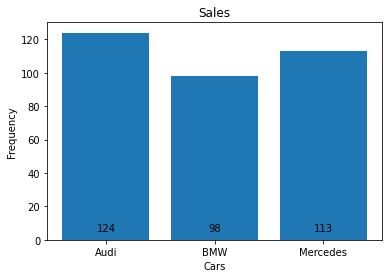

In [ ]:

cars = data_set["Car"]
frequency = data_set["Frequency"]

# Create bars
plt.bar(cars, frequency)

# Add title and axis names
plt.title("Sales")
plt.xlabel("Cars")
plt.ylabel("Frequency")

# Add frequency values on bars
[plt.text(i, 5, frequency[i], ha = 'center') for i in range(len(cars))]

# Show graphic
plt.show()

#### Side by side bar chart

In [ ]:
data_for_sbs = {
  "Types of investment/ investor": ["Stocks", "Bonds", "Real Estate"],
  "Investor A": [96, 181, 88],
  "Investor B": [185, 3, 152],
  "Investor C": [39, 29, 142]
}

data_set_sbs = pd.DataFrame(data_for_sbs)
data_set_sbs

,Types of investment/ investor,Investor A,Investor B,Investor C
0,Stocks,96,185,39
1,Bonds,181,3,29
2,Real Estate,88,152,142


In [ ]:
stocks = list(data_set_sbs.iloc[0, 1:].values)
bonds = list(data_set_sbs.iloc[1, 1:].values)
real_estate = list(data_set_sbs.iloc[2, 1:].values)

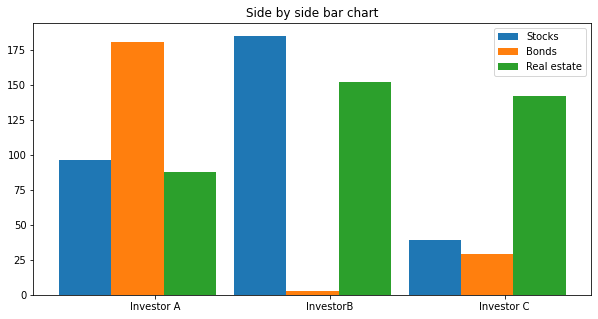

In [ ]:
# number of paris + position of bars on x-axis
ind = np.arange(3)

# Figure size
plt.figure(figsize=(10,5))

# Width of a bar 
width = 0.3       

# Plotting
plt.bar(ind, stocks , width, label='Stocks')
plt.bar(ind + width, bonds, width, label='Bonds')
plt.bar(ind + width + width, real_estate, width, label='Real estate')

# plt.xlabel('Here goes x-axis label')
# plt.ylabel('Here goes y-axis label')
plt.title('Side by side bar chart')


# First argument - A list of positions at which ticks should be placed
# Second argument -  A list of labels to place at the given locations
plt.xticks(ind + width + width / 3, ("Investor A", "InvestorB", "Investor C"))

# Finding the best position for legends and putting it
plt.legend(loc='best')
plt.show()

#### Pie chart

In [ ]:
# Add column to pandas with relative frequency in %

frequency = sum(data_set["Frequency"])
data_set["Relative frequency"] = (data_set["Frequency"] / frequency * 100).round().astype(int)
data_set

,Car,Frequency,Relative frequency
0,Audi,124,37
1,BMW,98,29
2,Mercedes,113,34


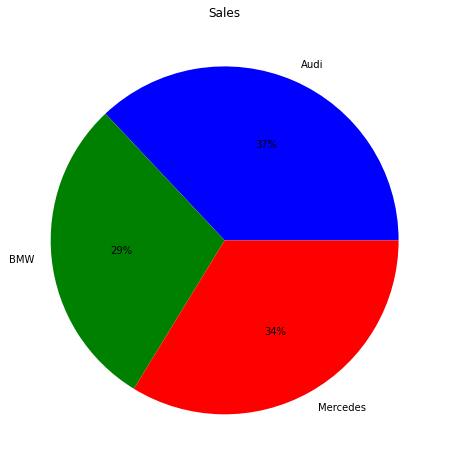

In [ ]:
cars = data_set["Car"]
frequency = data_set["Frequency"]
 
colors = ['b', 'g', 'r']
plt.figure(figsize=(8, 8))
plt.pie(frequency, colors=colors, labels=cars, autopct='%1.f%%')
plt.title("Sales")
plt.show()

#### Pareto diagram

In [ ]:
# Prepare table or pareto diagram

#sort DataFrame by frequency descending
data_set = data_set.sort_values(by='Frequency', ascending=False)

data_set['Cumulative frequency'] = data_set['Relative frequency'].cumsum()
# if Relative frequency is not in table, it an be automatically calculated:
# data_set['Cumulative frequency'] = data_set['Frequency'].cumsum()/data_set['Frequency'].sum()*100

data_set

,Car,Frequency,Relative frequency,Cumulative frequency
0,Audi,124,37,37
2,Mercedes,113,34,71
1,BMW,98,29,100


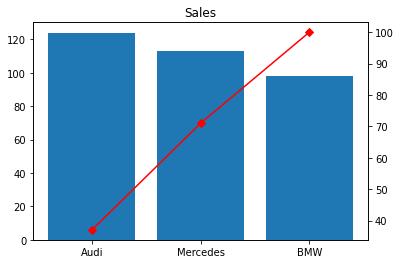

In [ ]:
fig, ax = plt.subplots()

ax.bar(data_set['Car'], data_set['Frequency'])

ax2 = ax.twinx()
ax2.plot(data_set['Car'], data_set['Cumulative frequency'], color="red", marker="D")

# Add title and axis names
plt.title("Sales")

plt.show()

### Numeric data

#### Histogram

In [ ]:
# Some random data

data_numeric = {
  "Data set": [1, 9, 22, 24, 32, 33, 42, 44, 57, 66, 70, 73, 75, 76, 79, 82, 87, 89, 95, 100]
}

data_set_numeric = pd.DataFrame(data_numeric)
data_set_numeric.head()

,Data set
0,1
1,9
2,22
3,24
4,32


In [ ]:
desired_intervals = 5
max_value = data_set_numeric["Data set"].iloc[-1]
min_value = data_set_numeric["Data set"].iloc[0]
value_len = len(data_set_numeric["Data set"])
step = round((max_value - min_value) / desired_intervals)
step

20

In [ ]:
frequency_distribution_table = data_set_numeric.groupby(pd.cut(data_set_numeric["Data set"], np.arange(0, 101, step))).count()
frequency_distribution_table["Realtive frequency"] = frequency_distribution_table / value_len
frequency_distribution_table

,Data set,Realtive frequency
Data set,,
"(0, 20]",2,0.10
"(20, 40]",4,0.20
"(40, 60]",3,0.15
"(60, 80]",6,0.30
"(80, 100]",5,0.25


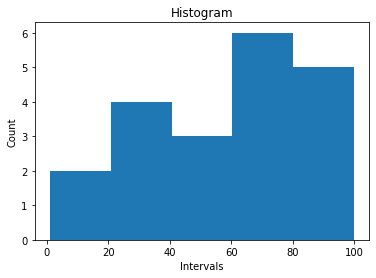

In [ ]:
# Frequency histogram

data_ = data_set_numeric["Data set"]
n, bins, patches = plt.hist(data_, bins=5)
   
plt.xlabel('Intervals')
plt.ylabel('Count')
  
plt.title("Histogram")
  
plt.show()

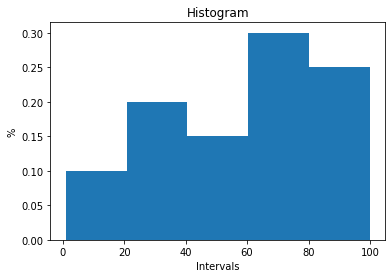

In [ ]:
# Relative frequency histogram

n, bins, patches = plt.hist(data_, bins=5, weights=np.ones_like(data_) / len(data_))
   
plt.xlabel('Intervals')
plt.ylabel('%')
  
plt.title("Histogram")
  
plt.show()

#### Scatter plots

In [ ]:
scores_a = [273, 292, 219, 241, 284, 247, 237, 286, 237, 266, 311, 324, 330, 331, 336, 344, 346, 346, 356, 364, 365, 365, 369, 436, 393, 394, 417, 438, 398, 409, 437, 442, 442, 408, 387, 418, 461, 457, 371, 383, 372, 463, 452, 550, 529, 578, 454, 522, 554, 591, 601, 610, 611, 613, 614, 619, 634, 646, 668, 673, 696, 704, 705, 705, 708, 713, 713, 727, 735, 763, 776, 777, 785, 785, 547, 507, 474, 536, 455, 470, 536, 522, 462, 467, 477, 505, 515, 450, 542, 509, 455, 524, 451, 505, 465, 525, 508, 511, 469, 457, 499, 528, 539, 549]
scores_b = [216, 282, 250, 217, 266, 294, 215, 203, 286, 263, 270, 211, 243, 275, 367, 378, 315, 208, 451, 346, 435, 579, 390, 589, 365, 480, 499, 414, 530, 366, 453, 396, 531, 453, 444, 597, 407, 589, 489, 349, 584, 446, 451, 300, 480, 580, 457, 525, 483, 470, 585, 406, 503, 516, 639, 546, 556, 599, 534, 526, 613, 536, 578, 608, 717, 718, 719, 720, 724, 734, 735, 736, 738, 740, 476, 452, 451, 503, 499, 509, 540, 496, 507, 457, 549, 519, 491, 487, 455, 546, 514, 533, 536, 503, 507, 489, 488, 520, 527, 521, 462, 536, 549, 521]

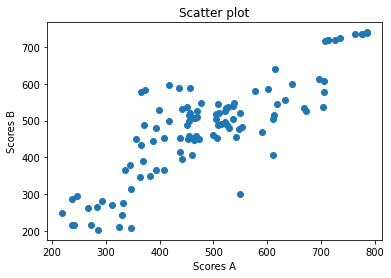

In [ ]:
plt.scatter(scores_a, scores_b)

plt.xlabel('Scores A')
plt.ylabel('Scores B')
  
plt.title("Scatter plot")

plt.show()

## Descriptive statistics

### Mean/ median/ mode

* **Mean**
 * Mean is easiley affected by outliers
 * Mean is not enough to make definite conclusions
 * sum(list) / len(list)
<br>
* **Median**
 * Median is number at middle position of sorted list
 * (n+1) / 2
<br>
* **Mode**
 * Most common value in list
 * If list consists of unique values than there is no mode

In [ ]:
random_values = random.sample(range(1, 50), 10)
random_values

[9, 29, 31, 49, 44, 35, 12, 39, 26, 37]

In [ ]:
# Mean

# from library

average1 = mean(random_values)
print(average1)

# with numpy
print(np.mean(random_values))

# manually

average2 = sum(random_values)/ len(random_values)
print(average2)

31.1
31.1
31.1


In [ ]:
# Median

# from library
sorted_list = sorted(random_values)
print(sorted_list)
print(median(sorted_list))

# with numpy (no need for sorting)
print(np.median(random_values))

# manually

mid = len(sorted_list) // 2
print((sorted_list[mid] + sorted_list[~mid]) / 2)

[9, 12, 26, 29, 31, 35, 37, 39, 44, 49]
33.0
33.0
33.0


In [ ]:
# Mode

some_values = [1,2,2,2,2,3,3,3,4,4,4,5,5]

# from library
print(mode(some_values))

# for numpy

print(st.mode(some_values))

# partly manually
from collections import Counter

c = Counter(some_values)
print([k for k, v in c.items() if v == c.most_common(1)[0][1]])

# manually

dict_counter = {}
for val in some_values:
  if not val in dict_counter:
    dict_counter[val] = 1
  else:
    dict_counter[val] += 1
print([mode_val for mode_val, curr_count in dict_counter.items() if curr_count==max(dict_counter.values())])

2
ModeResult(mode=array([2]), count=array([4]))
[2]
[2]


### Skewness

* Skewness indicates whether the observation in a data set are concentrated on one side

In [ ]:
# Positiv or right skew
dataset_skwe_1 = [1,1,1,1,2,2,2,2,2,2,3,3,3,3,4,4,5,5,7]
print(f"mean = {mean(dataset_skwe_1)}")
print(f"median = {median(dataset_skwe_1)}")
print(f"mode = {mode(dataset_skwe_1)}")


mean = 2.789473684210526
median = 2
mode = 2


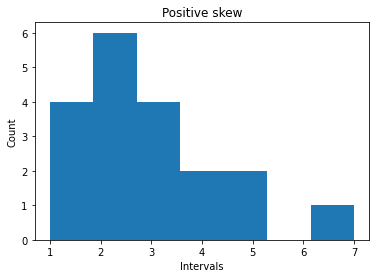

In [ ]:
# Frequency histogram

n, bins, patches = plt.hist(dataset_skwe_1, bins=7)
   
plt.xlabel('Intervals')
plt.ylabel('Count')
  
plt.title("Positive skew")
  
plt.show()

In [ ]:
# Zero or no skew
dataset_skwe_2 = [1,1,2,2,3,3,3,4,4,4,4,4,5,5,5,6,6,7,7]
print(f"mean = {mean(dataset_skwe_2)}")
print(f"median = {median(dataset_skwe_2)}")
print(f"mode = {mode(dataset_skwe_2)}")

mean = 4
median = 4
mode = 4


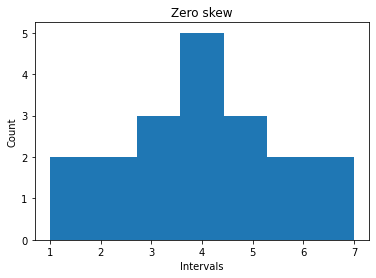

In [ ]:
# Frequency histogram

n, bins, patches = plt.hist(dataset_skwe_2, bins=7)
   
plt.xlabel('Intervals')
plt.ylabel('Count')
  
plt.title("Zero skew")
  
plt.show()

In [ ]:
# Negative or left skew

dataset_skwe_3 = [1,2,3,3,4,4,4,5,5,5,5,6,6,6,6,6,6,7,7,7]
print(f"mean = {mean(dataset_skwe_3)}")
print(f"median = {median(dataset_skwe_3)}")
print(f"mode = {mode(dataset_skwe_3)}")

mean = 4.9
median = 5.0
mode = 6


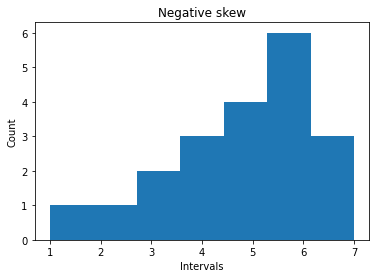

In [ ]:
# Frequency histogram

n, bins, patches = plt.hist(dataset_skwe_3, bins=7)
   
plt.xlabel('Intervals')
plt.ylabel('Count')
  
plt.title("Negative skew")
  
plt.show()

### Variannce

* Variance measures the dispersion of a set of data points around their mean value 
* Population variance:
$$ \sigma^2 = \frac{\sum_{i=1}^{N} (x_{i} - \mu)^2}{N} $$
* Sample variance:
$$ S^2 = \frac{\sum_{i=1}^{n} (x_{i} - \bar{x})^2}{n-1} $$

In [ ]:
# Population variance

data_population = [1, 2, 3, 4, 5]

mean_val = mean(data_population)
print(f"mean = {mean_val}")

# varaince manually

variance_manually = sum([(xi - mean_val) ** 2 for xi in data_population]) / len(data_population)
print(f"variance manually = {variance_manually}")


# with numpy

variance_np = np.var(data_population)
print(f"variance with numpy = {variance_np}")

mean = 3
variance manually = 2.0
variance with numpy = 2.0


In [ ]:
# Sample variance

data_sample = [1, 2, 3, 4, 5]

mean_val = mean(data_sample)
print(f"mean = {mean_val}")

# varaince manually

variance_manually_sample = sum([(xi - mean_val) ** 2 for xi in data_sample]) / (len(data_sample) - 1)
print(f"variance manually = {variance_manually_sample}")


# with numpy (ddof=1 represents n-1)

variance_np_sample = np.var(data_sample, ddof=1)
print(f"variance with numpy = {variance_np_sample}")


mean = 3
variance manually = 2.5
variance with numpy = 2.5


### Standard deviation

* Population standard deviation:
$$ \sigma = \sqrt{\sigma^2} $$
<br>
* Sample standard deviation
$$ S = \sqrt{S^2} $$
<br>
* Coefficient of variation (CV) or realtive standard deviation:
 * population
$$ c_{v} = \frac{\sigma}{\mu} $$
 * sample
 $$ \hat{c_{v}} = \frac{S}{\bar{x}} $$

In [ ]:
# sample example

price_for_product_in_dollars = [1, 2, 3, 3, 5, 6, 7, 8, 9, 11]
price_for_product_in_pesos = [val * 18.81 for val in price_for_product_in_dollars]

mean_dollars = round(mean(price_for_product_in_dollars), 2)
mean_pesos = round(mean(price_for_product_in_pesos), 2)

sample_variance_dollar = round(np.var(price_for_product_in_dollars, ddof=1), 2)
sample_variance_pesos = round(np.var(price_for_product_in_pesos, ddof=1), 2)

# Standart deviation - population - pstdev(), sample - stdev()

standart_deviation_dollars = round(statistics.stdev(price_for_product_in_dollars), 2)
standart_deviation_pesos = round(statistics.stdev(price_for_product_in_pesos), 2)

# Coefficient of variation
cv_dolalrs = round(standart_deviation_dollars / mean_dollars, 1)
cv_pesos = round(standart_deviation_pesos / mean_pesos, 1)



ds = pd.DataFrame({
    "Dollars": [mean_dollars, sample_variance_dollar, standart_deviation_dollars, cv_dolalrs],
    "Pesos": [mean_pesos, sample_variance_pesos, standart_deviation_pesos, cv_pesos]},
    index=["Mean", "Variance", "Standart deviation", "CV"]
)

ds

,Dollars,Pesos
Mean,5.50,103.45
Variance,10.72,3793.69
Standart deviation,3.27,61.59
CV,0.60,0.60


### Covariance and correlation

* Covariance is a measure of the joint variability of two variables
 * positive covariance - two variables move together
 * 0 covariance - two variables are independent
 * negative covariance - two variables move in opposite directions
* Sample formula
$$ S_{xy} = \frac{\sum_{i=1}^{n}(x_{i}-\bar{x}) * (y_{i} - \bar{y}) }{n-1} $$
* Population formula
$$ \sigma_{xy} = \frac{\sum_{i=1}^{N}(x_{i} - \mu_{x}) * (y_{i} - \mu_{y}) }{N} $$

<br><br>
* Correlation is a measure of the joint variability of two variables
 * correlation 1 - perfect positive correlation means that one variable is perfectly explaines by other
 * correlation 0 - variables are independent
 * correlation -1 - perfect negative correlation means that one variable is explaining the other one perfectly but they are moving in opposite directions
* Sample formula
$$ r = \frac{S_{xy}}{S_{x}S_{y}} $$
* Population formula
$$ \rho = \frac{\sigma_{xy}}{\sigma_{x}\sigma_{y}} $$

In [ ]:
data_set_cov = pd.DataFrame({
    "Size (ft.)": [650, 785, 1200, 720, 975],
    "Price ($)": [772_000, 998_000, 1_200_000, 800_000, 895_000]
})

data_set_cov

,Size (ft.),Price ($)
0,650,772000
1,785,998000
2,1200,1200000
3,720,800000
4,975,895000


In [ ]:
X = data_set_cov.iloc[:, 0]
Y = data_set_cov.iloc[:, 1]

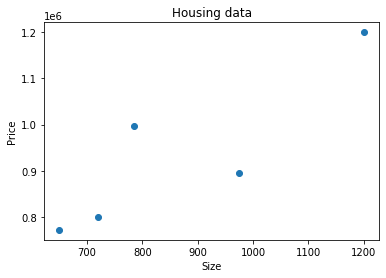

In [ ]:
plt.scatter(X, Y)

plt.xlabel('Size')
plt.ylabel('Price')
  
plt.title("Housing data")

plt.show()

In [ ]:
mean_val = np.mean(data_set_cov)

coveriance_ = (sum([(X[i] - mean_val[0]) * (Y[i] - mean_val[1]) for i in range(len(X))])) / (len(X) - 1)
coveriance_

33491250.0

In [ ]:
standard_deviation = np.std(data_set_cov, ddof=1)
standard_deviation

Size (ft.)       222.469099
Price ($)     173614.515522
dtype: float64

In [ ]:
correlation_ = round(coveriance_ / (standard_deviation[0] * standard_deviation[1]), 2)
correlation_

0.87

## Inferntial statistics

### Distributions

* Probability distribution is a function that shows the possible values for a variables and how often they occur
* Normal distribution (gaussian distribution or bell shaped distribution) - mean, median and mode are equal and has no skew
$$ N \; \tilde \;(\mu, \sigma^2) $$
N - normal
<br>
~ - distribution 
<br>
μ - mean
<br>
σ squared - variance
<br><br>

* Standart normal distribution is a particular case of the normal distribution. It has a mean of 0 and a standart deviation of 1.
* Standartization formula (z-score):
$$ z = \frac{x - \mu}{\sigma} $$

In [ ]:
rand_data_set = pd.DataFrame({
    "original_dataset": [1,2,2,3,3,3,4,4,5]
})
rand_data_set

,original_dataset
0,1
1,2
2,2
3,3
4,3
5,3
6,4
7,4
8,5


In [ ]:
mean_v = np.mean(rand_data_set)
st_dev = np.std(rand_data_set, ddof=1)
print(f"mean = {mean_v}")
print(f"standard deviation = {st_dev}")

mean = original_dataset    3.0
dtype: float64
standard deviation = original_dataset    1.224745
dtype: float64


In [ ]:
rand_data_set["subtract mean"] = rand_data_set["original_dataset"] - mean_v[0]
rand_data_set

,original_dataset,subtract mean
0,1,-2.0
1,2,-1.0
2,2,-1.0
3,3,0.0
4,3,0.0
5,3,0.0
6,4,1.0
7,4,1.0
8,5,2.0


In [ ]:
rand_data_set["divide by std"] = rand_data_set["subtract mean"] / st_dev[0]
rand_data_set

,original_dataset,subtract mean,divide by std
0,1,-2.0,-1.632993
1,2,-1.0,-0.816497
2,2,-1.0,-0.816497
3,3,0.0,0.000000
4,3,0.0,0.000000
5,3,0.0,0.000000
6,4,1.0,0.816497
7,4,1.0,0.816497
8,5,2.0,1.632993


In [ ]:
new_mean_v = np.mean(rand_data_set["divide by std"])
new_st_dev = np.std(rand_data_set["divide by std"], ddof=1)
print(f"mean = {new_mean_v}")
print(f"standard deviation = {new_st_dev}")

mean = 0.0
standard deviation = 1.0


### Central limit theorem

* Central limit theorem (CLT) states that no matter the underlying distribution of the dataset, the sampling distribution of the means would approximate a normal distribution.
$$ N \; \tilde \; (\mu, \frac{\sigma^{2}}{n}) $$

### Standard error

* Standard error - standard deviation of the distribution formed by the sample means
$$ \sqrt{\frac{\sigma^{2}}{n}} = \frac{\sigma}{\sqrt{n}} $$

### Estimators and estimates

* **Estirmator** is a mathematical function that approximatesa population parameter depending only on sample information
* **Estimate** is the output that you get from the estimator when you apply formula.
 * Point estimates - signle values
 * Confidence intervals - intervals

### Confidence intervals and margin of error

* Confidence interval is an interval which we are confident the population parameter will fall. We build confidence interval around the point estimete.
* General formula
$$ [\bar{x} - ME, \bar{x} + ME ] $$
where ME - margin of error
$$ ME = reliability \; factor * \frac{standard \; deviation}{\sqrt{sample \; size}} $$
population:
$$ ME = z_{a/2} * \frac{\sigma}{\sqrt{n}} $$
sample:
$$ ME = t_{v,a/2} * \frac{s}{\sqrt{n}} $$

for confidence level =95% / α = 5%
<br>
for confidence level =99% / α = 1%
<br>

* z value comes from z-score table, example:
 * Confidence interval = 95%
 * α = 0.05 => α / 2 = 0.025
 * value which you need to search in table = 1 - 0.025 = 0.975
 * In z-score table this value gets 1.9 from column and 0.06 from row
 * result for this example:
 $$ z_{0.025} = 1.9 + 0.06 = 1.96 $$

In [ ]:
# Example confidence intervals, population known, z-score

data_set_ci = [117313, 104002, 113038, 101936, 84560, 113136, 80740, 100536, 105052, 87201, 91986, 94868, 90745, 102848, 85927, 112276, 108637, 96818, 92307, 114564, 109714, 108833, 115295, 89279, 81720, 89344, 114426, 90410, 95118, 113382]

sample_mean = round(mean(data_set_ci), 0)
population_standard_deviation = 15000
standard_error = round(population_standard_deviation / len(data_set_ci) ** 0.5, 0)

print(f"sample_mean = {sample_mean}")
print(f"standard_error = {standard_error}")

sample_mean = 100200.0
standard_error = 2739.0


In [ ]:
# confidence level 95%
z_score_0_025 = 1.96 
interval_low = sample_mean - z_score_0_025 * standard_error
interval_high = sample_mean + z_score_0_025 * standard_error
print(f"With confidence level 95% we get confidence interval {interval_low} - {interval_high}")

With confidence level 95% we get confidence interval 94831.56 - 105568.44


In [ ]:
# confidence level 99%
z_score_0_005 = 2.58 
interval_low = sample_mean - z_score_0_005 * standard_error
interval_high = sample_mean + z_score_0_005 * standard_error
print(f"With confidence level 99% we get confidence interval {interval_low} - {interval_high}")

With confidence level 99% we get confidence interval 80551.48 - 104514.52


### Students T distribution

* Students T distribution is used for creating confidence intervals and testing hypotheses with normally distributed populations when the sample sizes are very smal.
* This distribution has lower peak and fatter tails than normal distribution, this reflect higher lever of uncertainty
$$ t_{v,\alpha} = \frac{\bar{x} - \mu}{s / \sqrt{n}} $$

where v is degree of freedom (n - 1)

In [ ]:
data_set_t = [78_000, 90_000, 75_000, 117_000, 105_000, 96_000, 89_500, 102_300, 80_000]

sample_mean = round(mean(data_set_t), 0)
sample_standard_deviation = statistics.stdev(data_set_t)
standard_error = round(sample_standard_deviation / len(data_set_t) ** 0.5, 0)

print(f"sample_mean = {sample_mean}")
print(f"sample_standard_deviation = {sample_standard_deviation}")
print(f"standard_error = {standard_error}")

sample_mean = 92533.0
sample_standard_deviation = 13931.887883556916
standard_error = 4644.0


In [ ]:
# confidence level 95%
t_score_8_0_025 = 2.31
interval_low_t = sample_mean - t_score_8_0_025 * standard_error
interval_high_t = sample_mean + t_score_8_0_025 * standard_error
print(f"With confidence level 95% we get confidence interval {interval_low_t} - {interval_high_t}")

With confidence level 95% we get confidence interval 81805.36 - 103260.64


### Confidence interval for difference of two means

Confidence interval for difference of two means, dependent samples

In [ ]:
# Example of dependent samples

data_set_two = pd.DataFrame({
    "Before": [2, 1.4, 1.3, 1.1, 1.8, 1.6, 1.5, 0.7, 0.9, 1.5],
    "After": [1.7, 1.7, 1.8, 1.3, 1.7, 1.5, 1.6, 1.7, 1.7, 2.4]
})
data_set_two

,Before,After
0,2.0,1.7
1,1.4,1.7
2,1.3,1.8
3,1.1,1.3
4,1.8,1.7
5,1.6,1.5
6,1.5,1.6
7,0.7,1.7
8,0.9,1.7
9,1.5,2.4


In [ ]:
# Difference

data_set_two["Difference"] = data_set_two["After"] - data_set_two["Before"]
data_set_two

,Before,After,Difference
0,2.0,1.7,-0.3
1,1.4,1.7,0.3
2,1.3,1.8,0.5
3,1.1,1.3,0.2
4,1.8,1.7,-0.1
5,1.6,1.5,-0.1
6,1.5,1.6,0.1
7,0.7,1.7,1.0
8,0.9,1.7,0.8
9,1.5,2.4,0.9


In [ ]:
difference = data_set_two["Difference"]
sample_mean_ = round(mean(difference), 2)
sample_standard_deviation_ = round(statistics.stdev(difference), 2)
standard_error_ = round(sample_standard_deviation_ / len(difference) ** 0.5, 2)

print(f"sample_mean = {sample_mean_}")
print(f"sample_standard_deviation = {sample_standard_deviation_}")
print(f"standard_error = {standard_error_}")

sample_mean = 0.33
sample_standard_deviation = 0.45
standard_error = 0.14


In [ ]:
# confidence level 95%
t_score = 2.26
interval_low_t = round(sample_mean_ - t_score * standard_error_, 2)
interval_high_t = round(sample_mean_ + t_score * standard_error_, 2)
print(f"With confidence level 95% we get confidence interval {interval_low_t} - {interval_high_t}")

With confidence level 95% we get confidence interval 0.01 - 0.65


Confiddence interval for the diffrenece of two means. Independent samples, variance known.

$$ (\bar{x} - \bar{y}) \pm z_{\alpha / 2} \sqrt{\frac{\sigma_{x}^{2}}{n_{x}} + \frac{\sigma_{y}^{2}}{n_{y}}}  $$

In [ ]:
# data
size_eng = 100
size_maneg = 70
sample_mean_eng = 58
sample_mean_manag = 65
population_std_eng = 10
population_std_manag = 5
standard_error = round((population_std_eng ** 2 / size_eng) + (population_std_manag ** 2 / size_maneg), 2)

In [ ]:
# Confidence interval
z_score = 1.96 
ci_low = round((sample_mean_eng - sample_mean_manag) - z_score * standard_error ** 0.5, 2)
ci_high = round((sample_mean_eng - sample_mean_manag) + z_score * standard_error ** 0.5, 2)
print(f"With confidence level 95% we get confidence interval {ci_low} - {ci_high}")

With confidence level 95% we get confidence interval -9.29 - -4.71


Confidence interval for difference of two means, independent samples, variance unknown but assumed to be equal.
<br>
Pooled variance formula:
$$ s_{p}^{2} = \frac{(n_{x} - 1) s_{x}^{2} + (n_{y} - 1) s_{y}^{2} }{ n_{x} + n_{y} - 2 } $$

confidence interval formula:
$$ (\bar{x} - \bar{y}) \pm t_{n_{x}+n{y}-2,\alpha / 2} \sqrt{\frac{s_{p}^{2}}{n_{x}} + \frac{s_{p}^{2}}{n_{y}}}  $$

In [ ]:
NY_apples = [3.8, 3.76, 3.87, 3.99, 4.02, 4.25, 4.13, 3.98, 3.99, 3.62]
LA_apples = [3.02, 3.22, 3.24, 3.02, 3.06, 3.15, 3.81, 3.44]

mean_NY = round(mean(NY_apples), 2)
mean_LA = round(mean(LA_apples), 2)
std_NY = round(statistics.stdev(NY_apples), 2)
std_LA = round(statistics.stdev(LA_apples), 2)
standard_error = round((std_NY ** 2 / len(NY_apples)) + (std_LA ** 2 / len(LA_apples)), 2)
print(f"mean_NY = {mean_NY} / std_NY = {std_NY}")
print(f"mean_LA = {mean_LA} / std_LA = {std_LA}")
print(f"standard_error = {standard_error}")

mean_NY = 3.94 / std_NY = 0.18
mean_LA = 3.25 / std_LA = 0.27
standard_error = 0.01


In [ ]:
# pooled variance

pooled_variance = round((((len(NY_apples) - 1) * std_NY **2) + ((len(LA_apples) - 1) * std_LA **2)) / (len(NY_apples) + len(LA_apples) - 2), 2)
pooled_std = round(pooled_variance **0.5, 2)

print(f"pooled_variance = {pooled_variance}")
print(f"pooled_std = {pooled_std}")

pooled_variance = 0.05
pooled_std = 0.22


In [ ]:
# confidence interval

t_score = 2.21

ci_low = round((mean_NY - mean_LA) - t_score * standard_error ** 0.5, 2)
ci_high = round((mean_NY - mean_LA) + t_score * standard_error ** 0.5, 2)
print(f"With confidence level 95% we get confidence interval {ci_low} - {ci_high}")

With confidence level 95% we get confidence interval 0.47 - 0.91


## Hypothesis testing

* Steps in data-driven decision making
 * Formulatea hypothesis
 * Find the right test
 * Execute the test
 * Make a decision
<br>
* Hypotheis is an idea that can be tested

* Hypothesis:
 * null hypothesis (the one who needs to be tested): $$ H_{0} $$
 * Alternative hypothesis (everything else) $$ H_{1} \; or \; H_{A} $$
 <br>
 * Null hypothesis is the statement we are trying to reject. Therefore null is the present state of affairs while the alternative is our personal opinion.

* Significance level - the probability of rejecting the null hypothesis, if it is true. Typical values - 0.01, 0.05, 0.1 (0.05 most common value) and denoted with $$ \alpha $$

* Errors:
 * Type 1 error - reject a true null hypothesis (false positive)
 * Type 2 error - accept a false null hypothesis (false negative)
 * Rejecting a false null hypothesis (a.k.a. power of the test) probability is equal $$ 1-\beta $$

* p-value:
 * p-value is the smallest level of significance at which we can still reject the null hypothesis, given the observed sample statistic
 * if the p-values is lower than the level of significance, than we reject the null hypothesis

